In [12]:
# import statements
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import glob
%matplotlib inline
# read all txt files in a directory
def readDF(path):
    l = [pd.read_csv(filename, encoding = "ISO-8859-1") for filename in glob.glob(path)]
    print(type(l))
    df = pd.concat(l, axis=0)
    return df

# test to see if the function does the job
dirpath = "/Users/ChineseSamurai/Documents/train_data/*.txt"
df = readDF(dirpath)
df.head(5)
# yes it does.

/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (38,130,131,132,133,134,135,136) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ChineseSamurai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (38,42,120,126,127,128,129,130,131,132,133,134,135,136) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'list'>


,ACCAUSE,ACCDMG,ACCTRK,ACCTRKCL,ADJUNCT1,ADJUNCT2,ADJUNCT3,ALCOHOL,AMPM,AMTRAK,...,VISIBLTY,WEATHER,YEAR,YEAR4,adjunct1,adjunct2,adjunct3,mopera,signal,subdiv
0,T108,7400.0,2.0,1,NaN,NaN,NaN,NaN,AM,K,...,2,1,1,2001,NaN,NaN,NaN,NaN,NaN,NaN
1,E79L,25000.0,2.0,1,NaN,NaN,NaN,NaN,AM,C,...,4,1,1,2001,NaN,NaN,NaN,NaN,NaN,NaN
2,E79L,8000.0,1.0,1,NaN,NaN,NaN,NaN,PM,K,...,2,2,1,2001,NaN,NaN,NaN,NaN,NaN,NaN
3,H303,10000.0,2.0,1,NaN,NaN,NaN,0.0,AM,C,...,4,2,1,2001,NaN,NaN,NaN,NaN,NaN,NaN
4,M404,15972.0,1.0,3,NaN,NaN,NaN,NaN,PM,K,...,4,3,1,2001,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# writing out the dataframe to a csv file.
df=df.reset_index()
del df['level_0']
del df['index']
df.to_csv('/Users/ChineseSamurai/Documents/train_data.csv')

In [96]:
# initiate a list to store narratives for each accident
narrs = []
for i in range(len(df['NARR1'])):
    narrative = ''
    # loop through all narratives
    for j in range(1,16):
        narr_name = 'NARR' + str(j)
        # concatenate all narratives one by one
        # omit missing values
        if(pd.isnull(df.ix[i,narr_name]) != True):
            narrative = narrative + str(df.ix[i,narr_name])
    # then add to the list of narratives
    narrs.append(narrative)
# the list should now contain concatenated narrative data for every accident.
print(narrs[100])
print(narrs[1])
print(narrs[9999])

TRAIN NO.#3 WITH DIESELS 85/15/87/44 AND 27 CARS STRUCK A SEMI-TRACTOR TRAILER TRUCK AT MP344.78, MAIN ST CROSSING CAUSING DAMAGE TO DIESEL UNIT NO.#85.
ENGINE 286 CAUGHT FIRE AT THE SPRINGFIELD, MA STATION DUE TO BEARINGS IN MAIN GENERATOR LET GO.
A VEHICLE BEING PARKED NEXT TO THE RIGHT OF WAY, ROLLED DOWN AN EMBANKMENT.  THE VEHICLE CAME TO A STOP NEXT TO THE WEST RAIL OF TRACK #2 FOULING SAME.  TRAIN #2696 WAS OPERATING SOUTH ON TRACK #3 ANDSTRUCK THE REAR OF THE VEHICLE.


In [4]:
# Provide summary statistics and visualizations for the major predictor and 
# response variables. Comment on what your observe in the data.

# 4 predictors
# type: type of accident
# trnspd: speed of train in miles per hour
# loaded1: car loaded or not (first involved): 
# loaded2: car loaded or not (causing):

# 2 responses
# casinj + caskld: total casualties for all RR involved
# eqpdmg: reportable equipment damage in $ 

In [18]:
# 'type'
map_type = {1:'derailment', 2:'head on collision', 3:'rearend collision', 4:'side collision', 
             5:'raking collision',6:'broken train collision', 7:'hwy-rail crossing', 8:'RR Grade Crossing', 
             9:'obstruction', 10:'explosive–detonation', 11: 'fire / violent rupture', 12: 'other impacts',
             13 : 'other (described in narrative)'
}
df['TYPE'] = df['TYPE'].map(map_type)
Counter(df['TYPE'])

Counter({'RR Grade Crossing': 6,
         'broken train collision': 104,
         'derailment': 28370,
         'explosive–detonation': 15,
         'fire / violent rupture': 393,
         'head on collision': 235,
         'hwy-rail crossing': 3382,
         'obstruction': 1094,
         'other (described in narrative)': 2142,
         'other impacts': 6462,
         'raking collision': 1090,
         'rearend collision': 587,
         'side collision': 3003})

In [ ]:
# 'trnspd'
df.TRNSPD.plot(kind = 'hist')
# very much right skewed.

In [2]:
# 'loaded 1'
Counter(df['LOADED1'])

Counter({nan: 8373, 'N': 16269, 'Y': 22241})

In [3]:
# 'loaded 2'
Counter(df['LOADED2'])

# many more missing values in loaded2 than in loaded1

Counter({nan: 42719, 'N': 1466, 'Y': 2698})

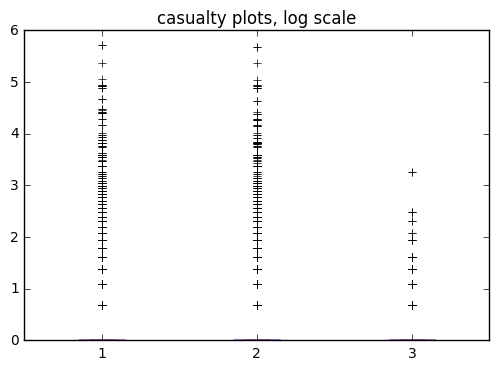

In [19]:
# 'casinj + caskld'
df.CASTOT = df.CASINJ + df.CASKLD
df.CASTOT

plt.boxplot([np.log(df.CASTOT + 1),np.log(df.CASINJ + 1),np.log(df.CASKLD + 1)])
plt.title("casualty plots, log scale")

# CASinj and CAStot share the same pattern, whereas CASkld does not share the same pattern with the two. 

{'boxes': [<matplotlib.lines.Line2D at 0x11a0c60f0>],
 'caps': [<matplotlib.lines.Line2D at 0x11badca20>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bad7438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bad7c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11a0c56a0>,
  <matplotlib.lines.Line2D at 0x11a0c5518>]}

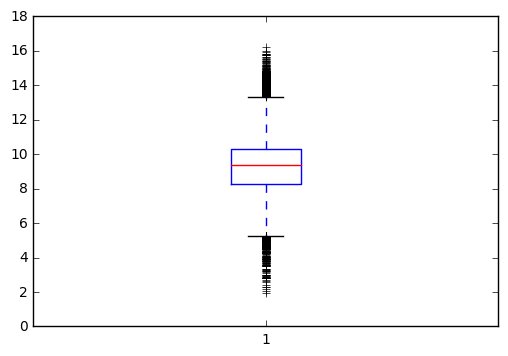

In [23]:
# 'eqpdmg'
df.EQPDMG.describe()
plt.boxplot([np.log(df.EQPDMG)])
plt.title("equipment damage plot, log scale")
# Looks like log-scale egpdmg has a even distribution. 